# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


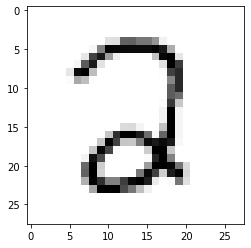

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.24526888437926928
train accuracy is: 0.656401268569521, test accuracy is 0.6421370967741935


Epoch 10 Loss 0.09024455840358246
train accuracy is: 0.9165414788849942, test accuracy is 0.9233870967741935


Epoch 20 Loss 0.0553738539767646
train accuracy is: 0.9414121181772659, test accuracy is 0.9546370967741935


Epoch 30 Loss 0.04370310712073794
train accuracy is: 0.9510098481054916, test accuracy is 0.9601814516129032


Epoch 40 Loss 0.037958898292618545
train accuracy is: 0.956935403104657, test accuracy is 0.9637096774193549


Epoch 50 Loss 0.03449738182375585
train accuracy is: 0.9605241195126022, test accuracy is 0.9647177419354839


Epoch 60 Loss 0.03212102875384925
train accuracy is: 0.9631113336671674, test accuracy is 0.9667338709677419


Epoch 70 Loss 0.030351267627023303
train accuracy is: 0.9647805040894676, test accuracy is 0.9682459677419355


Epoch 80 Loss 0.028948618582473305
train accuracy is: 0.9658654648639626, test accuracy is 0.9702620967741935


Epoch 90 Loss 0.027764458193295455
train accuracy is: 0.9671173426806877, test accuracy is 0.969758064516129


Epoch 100 Loss 0.02675140256476947
train accuracy is: 0.9688699716241028, test accuracy is 0.9707661290322581


Epoch 110 Loss 0.025871493455686335
train accuracy is: 0.9695376397930229, test accuracy is 0.9712701612903226


Epoch 120 Loss 0.025105958908187422
train accuracy is: 0.970372225004173, test accuracy is 0.9717741935483871


Epoch 130 Loss 0.024419831023667207
train accuracy is: 0.9711233516942079, test accuracy is 0.9717741935483871


Epoch 140 Loss 0.02379934796488666
train accuracy is: 0.9722083124687031, test accuracy is 0.9717741935483871


Epoch 150 Loss 0.023219292371647236
train accuracy is: 0.9729594391587381, test accuracy is 0.9722782258064516


Epoch 160 Loss 0.022684614605931578
train accuracy is: 0.9734601902854282, test accuracy is 0.9717741935483871


Epoch 170 Loss 0.022189825781324623
train accuracy is: 0.9743782340176932, test accuracy is 0.9727822580645161


Epoch 180 Loss 0.021725127132726285
train accuracy is: 0.9747955266232682, test accuracy is 0.9727822580645161


Epoch 190 Loss 0.02128322373667246
train accuracy is: 0.9756301118344183, test accuracy is 0.9732862903225806


Epoch 200 Loss 0.02086517340034219
train accuracy is: 0.9761308629611083, test accuracy is 0.9727822580645161


Epoch 210 Loss 0.0204656372804168
train accuracy is: 0.9765481555666834, test accuracy is 0.9727822580645161


Epoch 220 Loss 0.020082668728552296
train accuracy is: 0.9774661992989484, test accuracy is 0.9722782258064516


Epoch 230 Loss 0.01971345318907356
train accuracy is: 0.9777165748622935, test accuracy is 0.9727822580645161


Epoch 240 Loss 0.01936025538994022
train accuracy is: 0.9777165748622935, test accuracy is 0.9727822580645161


0.012939742732587231

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.24882805209901265
train accuracy is: 0.64304790519112, test accuracy is 0.6527217741935484


Epoch 10 Loss 0.10219631289638167
train accuracy is: 0.913620430645969, test accuracy is 0.9233870967741935


Epoch 20 Loss 0.07805158803326018
train accuracy is: 0.9298948422633951, test accuracy is 0.9450604838709677


Epoch 30 Loss 0.06715180799178945
train accuracy is: 0.9392421966282758, test accuracy is 0.9506048387096774


Epoch 40 Loss 0.06065463531674327
train accuracy is: 0.943665498247371, test accuracy is 0.952116935483871


Epoch 50 Loss 0.056250901564174755
train accuracy is: 0.9467534635286263, test accuracy is 0.9556451612903226


Epoch 60 Loss 0.05302749689453237
train accuracy is: 0.9486730095142714, test accuracy is 0.9561491935483871


Epoch 70 Loss 0.050542952025514155
train accuracy is: 0.9507594725421465, test accuracy is 0.9566532258064516


Epoch 80 Loss 0.04855530671294452
train accuracy is: 0.9521782674011017, test accuracy is 0.9591733870967742


Epoch 90 Loss 0.04692066470344982
train accuracy is: 0.9533466866967117, test accuracy is 0.9596774193548387


Epoch 100 Loss 0.04554406260305284
train accuracy is: 0.9542647304289767, test accuracy is 0.9606854838709677


Epoch 110 Loss 0.04436454338570461
train accuracy is: 0.9545151059923218, test accuracy is 0.9611895161290323


Epoch 120 Loss 0.04333906937066657
train accuracy is: 0.9550158571190118, test accuracy is 0.9616935483870968


Epoch 130 Loss 0.042436301038399314
train accuracy is: 0.9556835252879319, test accuracy is 0.9632056451612904


Epoch 140 Loss 0.04163364208694399
train accuracy is: 0.956017359372392, test accuracy is 0.9632056451612904


Epoch 150 Loss 0.04091215159732949
train accuracy is: 0.957018861625772, test accuracy is 0.9642137096774194


Epoch 160 Loss 0.04026062196115349
train accuracy is: 0.9577699883158071, test accuracy is 0.9652217741935484


Epoch 170 Loss 0.039667230609581654
train accuracy is: 0.9582707394424971, test accuracy is 0.9652217741935484


Epoch 180 Loss 0.03912394216972372
train accuracy is: 0.9587714905691871, test accuracy is 0.9652217741935484


Epoch 190 Loss 0.03862388617881734
train accuracy is: 0.9592722416958771, test accuracy is 0.9652217741935484


Epoch 200 Loss 0.03816201914945491
train accuracy is: 0.9597729928225672, test accuracy is 0.9652217741935484


Epoch 210 Loss 0.03773272854717783
train accuracy is: 0.9601068269070272, test accuracy is 0.9647177419354839


Epoch 220 Loss 0.03733264851395267
train accuracy is: 0.9602737439492572, test accuracy is 0.9647177419354839


Epoch 230 Loss 0.0369583892226744
train accuracy is: 0.9603572024703723, test accuracy is 0.9642137096774194


Epoch 240 Loss 0.0366076743871632
train accuracy is: 0.9605241195126022, test accuracy is 0.9637096774193549


0.10447369257245323

### Comparing results of NN and LR

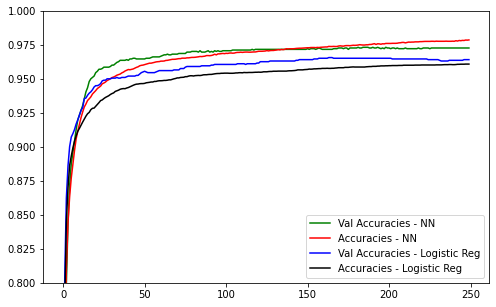

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

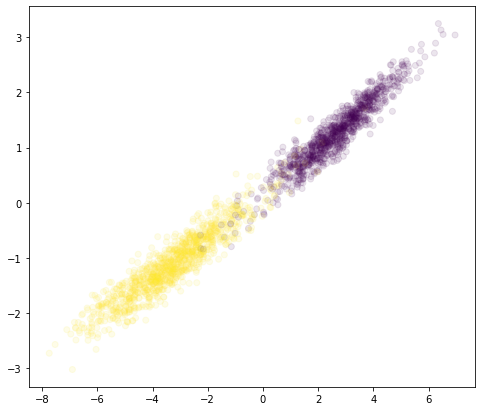

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

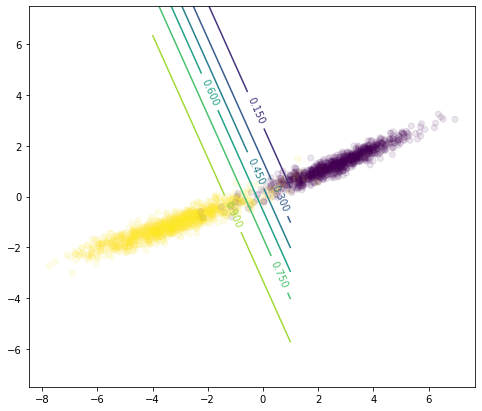

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );